**Project #1**

**Description**
For this project, a small corpus of 430 sentences taken from different Wikipedia sources has been translated from English into Italian by three professional translators, that we will call subjects. Each sentence has been translated only once by each subject in one of the following modalities:



Translation from scratch, in which the translator performs the translation without having access to anything but the source text in English.

Post-editing of a commercial MT system, in which the translator post-edits a machine translation of the original source text produced by the Google Translate API.

Post-editing of a multilingual research MT model, in which the translator post-edits a machine translation of the original source text produced by an mBART model fine-tuned for multilingual machine translation from English into 50 languages.



The three modalities are assigned at random to subjects for each sentence so that every sentence is translated exactly once for every modality.



The platform PET, used to carry out the translations, collects a fine-grained history of keylogs, edit times, and other information related to the translation process. Moreover, this information has been post-processed to extract interesting aggregates such as the type of edits that have been performed by the translator during the post-editing of the sentence. The full list of features is provided on the dataset page in the Dataset Hub.


The data have already been split into a training set and a test set. The test set has been replicated into three test sets, each one masking respectively: (i) the subject information, (ii) the translation modality information, and (iii) the temporal information, in order to prevent involuntary leaking of information during test time. Your main goal is to use the training set to select which features are most effective in identifying a subject as the author of a translation in the test set lacking subject information, exploring both linguistic and behavioral information available in the training set. The analysis should not be limited to a simple fitting of a model on the scores provided.

**First, We have to load packages**

In [1]:
!pip install spacy transformers sentencepiece datasets scikit-learn pandas

!sudo python -m spacy download en_core_web_sm


     |████████████████████████████████| 3.8 MB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 54.9 MB/s 
     |████████████████████████████████| 325 kB 47.5 MB/s 
     |████████████████████████████████| 596 kB 15.7 MB/s 
     |████████████████████████████████| 895 kB 36.7 MB/s 
     |████████████████████████████████| 6.5 MB 37.0 MB/s 
     |████████████████████████████████| 67 kB 4.3 MB/s 
     |████████████████████████████████| 212 kB 39.1 MB/s 
     |████████████████████████████████| 1.1 MB 39.7 MB/s 
     |████████████████████████████████| 134 kB 38.6 MB/s 
     |████████████████████████████████| 127 kB 15.6 MB/s 
     |████████████████████████████████| 144 kB 37.9 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 271 kB 28.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
   

**Loading dataset ...**

In [ ]:
from datasets import load_dataset
import pandas as pd

trainDataPath = f''
data= load_dataset('GroNLP/ik-nlp-22_pestyle', 'full', data_dir=trainDataPath)


Using custom data configuration full-data_dir=


Generating train split: 0 examples [00:00, ? examples/s]

Dataset ik_nlp22_pe_style downloaded and prepared to /root/.cache/huggingface/datasets/GroNLP___ik_nlp22_pe_style/full-data_dir=/1.0.0/3bbf0fda4806257149c2beb42c6cd20db6f79dac9ae2498f44be55fa7a953d51. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dfTrain= pd.DataFrame(data['train'])
dfTrain

,item_id,subject_id,modality,src_text,mt_text,tgt_text,edit_time,k_total,k_letter,k_digit,...,len_pause_geq_1000,num_annotations,n_insert,n_delete,n_substitute,n_shift,bleu,chrf,ter,aligned_edit
0,11,t1,ht,"UN peacekeepers, whom arrived in Haiti after t...",nan,"I corpi di pace armati delle Nazioni Unite, ch...",149.979996,268,204,4,...,95007,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1,11,t2,pe2,"UN peacekeepers, whom arrived in Haiti after t...","I soldati della pace dell'ONU, che sono arriva...","Le forze di pace delle Nazioni Unite, arrivate...",128.078995,179,102,0,...,87014,2,0.0,2.0,15.0,1.0,29.290001,56.939999,58.064999,"REF: i soldati della pace dell'onu, che ..."
2,11,t3,pe1,"UN peacekeepers, whom arrived in Haiti after t...","Le forze di pace delle Nazioni Unite, arrivate...","Le forze di pace dell'ONU, arrivate ad Haiti d...",141.500000,57,27,0,...,98938,1,1.0,2.0,2.0,0.0,74.660004,84.959999,18.518999,"REF: le forze di pace delle nazioni unite, ..."
3,12,t1,ht,"According to the lawsuit, waste from the UN ca...",nan,"Secondo la causa, i rifiuti derivanti dal camp...",151.317993,276,210,0,...,84118,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
4,12,t2,pe2,"According to the lawsuit, waste from the UN ca...","Secondo la causa, i rifiuti del campo delle Na...","Secondo l'accusa, i rifiuti del campo delle Na...",66.817001,67,52,0,...,45450,2,2.0,1.0,4.0,0.0,65.480003,83.419998,25.000000,"REF: secondo la causa, i rifiuti del campo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1165,1073,t2,ht,"However, due to the slow communication channel...",nan,"Tuttavia, a causa dei lenti canali di comunica...",61.193001,147,104,5,...,30271,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan
1166,1073,t3,pe2,"However, due to the slow communication channel...","Tuttavia, a causa dei canali di comunicazione ...","Tuttavia, per via di canali di comunicazione l...",143.360001,69,37,0,...,129330,1,1.0,0.0,8.0,0.0,43.189999,65.019997,47.368000,"REF: tuttavia, a causa dei canali di comuni..."
1167,1074,t1,pe1,towards the end of the Middle Ages western Eur...,verso la fine del Medioevo l'Europa occidental...,"Verso la fine del Medioevo, l'Europa occidenta...",154.690002,36,22,0,...,99549,1,2.0,0.0,3.0,0.0,68.160004,90.050003,14.286000,REF: verso la fine del medioevo l'europa occ...
1168,1074,t2,ht,towards the end of the Middle Ages western Eur...,nan,"Verso la fine del Medioevo, l'Europa occidenta...",182.785995,348,244,0,...,79632,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


**Tranforming null values to 0**

In [ ]:
df= pd.DataFrame(data['train'])
df[['src_text','tgt_text']].head(1)
df=dfTrain.fillna(0)


In [ ]:
df.head(1)

,item_id,subject_id,modality,src_text,mt_text,tgt_text,edit_time,k_total,k_letter,k_digit,...,len_pause_geq_1000,num_annotations,n_insert,n_delete,n_substitute,n_shift,bleu,chrf,ter,aligned_edit
0,11,t1,ht,"UN peacekeepers, whom arrived in Haiti after t...",nan,"I corpi di pace armati delle Nazioni Unite, ch...",149.979996,268,204,4,...,95007,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,nan


In [ ]:
subjects=['t1','t2','t3']
modalities=['ht','pe1','pe2']
cols=[modalities]
indexes=subjects
df=pd.DataFrame(index=indexes,columns=cols)

In [ ]:
Param_n_pause_geq_300='n_pause_geq_300'
subject='t1'
modality='pe1'
df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_n_pause_geq_300].sum()
#df.groupby(subject)[Param_n_pause_geq_300].mean()
df.groupby(['subject_id'])[Param_n_pause_geq_300].sum()

#print(f"subject\tmodality\t {Param_n_pause_geq_300}\t{Param_len_pause_geq_300}\t{Param_n_pause_geq_1000}\t{Param_len_pause_geq_1000}\n")


subject_id
t1     7461
t2     6669
t3    10038
Name: n_pause_geq_300, dtype: int64

In [ ]:

Param_n_pause_geq_300='n_pause_geq_300'
Param_len_pause_geq_300='len_pause_geq_300'
Param_n_pause_geq_1000='n_pause_geq_1000'
Param_len_pause_geq_1000='len_pause_geq_1000'
Param_edit_time='edit_time'
Param_n300_ratio= 'n300_ratio(%)'
Param_n1000_ratio='n1000_ratio(%)'
Param_TER = 'ter'
Param_BLEU='bleu'
Param_CHRF='chrf'
data=[]
for subject in subjects:
  for modality in modalities:
    data.append([subject,modality,
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_n_pause_geq_300].sum(),
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_len_pause_geq_300].sum(),
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_n_pause_geq_1000].sum(),
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_len_pause_geq_1000].sum(),
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_TER].mean(),
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_BLEU].mean(),
    df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_CHRF].mean(),
    ((df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_n_pause_geq_300].sum())/(df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_edit_time].sum()))*100,
    ((df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_n_pause_geq_1000].sum())/(df.loc[(df['subject_id'] == subject) & (df['modality']==modality), Param_edit_time].sum()))*100,

    ]

    )
columns=['subject_id','modality',Param_n_pause_geq_300,Param_len_pause_geq_300,Param_n_pause_geq_1000,Param_len_pause_geq_1000,Param_TER,Param_BLEU,Param_CHRF,Param_n300_ratio,Param_n1000_ratio]
dfNew=pd.DataFrame(data, columns=columns)
dfNew


,subject_id,modality,n_pause_geq_300,len_pause_geq_300,n_pause_geq_1000,len_pause_geq_1000,ter,bleu,chrf,n300_ratio(%),n1000_ratio(%)
0,t1,ht,5713,19585482,2083,17640825,0.000000,0.000000,0.000000,22.012312,8.025844
1,t1,pe1,517,5995326,288,5876229,11.553213,82.247869,91.400246,5.404688,3.010735
2,t1,pe2,1231,9822044,615,9501892,27.425280,62.703120,80.334000,9.578849,4.785534
3,t2,ht,4115,7745674,1386,6399453,0.000000,0.000000,0.000000,33.238089,11.195138
4,t2,pe1,896,3219133,434,2987776,18.503496,75.182880,87.692160,15.152207,7.339350
5,t2,pe2,1658,6308494,873,5933035,29.204294,58.926713,79.046573,16.462731,8.668253
6,t3,ht,5022,22295780,2160,20815219,0.000000,0.000000,0.000000,18.746474,8.063000
7,t3,pe1,2398,13561543,1350,12996410,34.991378,53.632727,75.233637,14.462169,8.141755
8,t3,pe2,2618,13314923,1434,12690400,44.957984,41.311475,68.106312,16.812336,9.208896


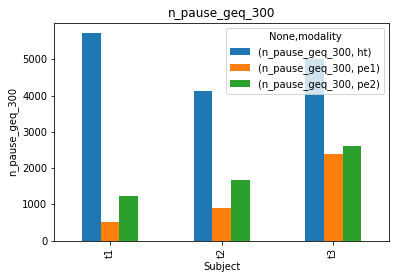

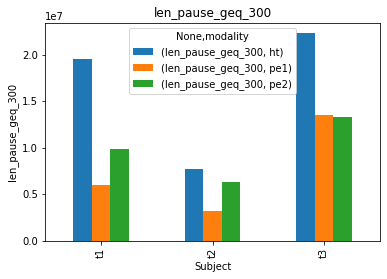

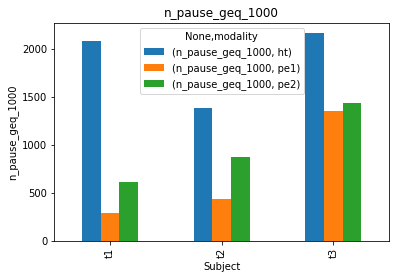

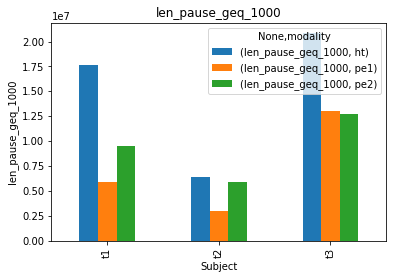

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
parameters=[Param_n_pause_geq_300,Param_len_pause_geq_300,Param_n_pause_geq_1000,Param_len_pause_geq_1000]
#parameters=[ Param_n300_ratio,Param_n1000_ratio]

#dfNew.groupby('subject_id').sum().plot(kind='bar')
for param in parameters:
  s=dfNew[['subject_id','modality',param]]
  #s.groupby(by=['subject_id']).sum().plot( kind='bar')
  s.groupby(by=['subject_id','modality']).sum().unstack().plot.bar()
  #.plot(kind='bar')
  plt.xlabel('Subject')
  plt.ylabel(param)
  plt.title(param)
  #plt.bar(data=s,color='CN')
  #plt.plot(data=s, kind='bar')
  plt.show



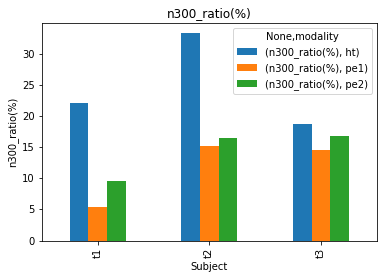

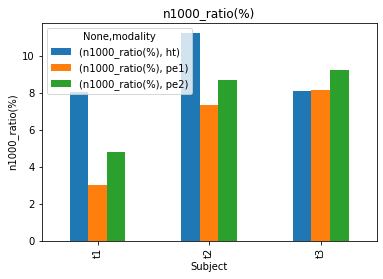

In [ ]:
parameters=[ Param_n300_ratio,Param_n1000_ratio]

#dfNew.groupby('subject_id').sum().plot(kind='bar')
for param in parameters:
  s=dfNew[['subject_id','modality',param]]
  #s.groupby(by=['subject_id']).sum().plot( kind='bar')
  s.groupby(by=['subject_id','modality']).mean().unstack().plot.bar()
  #.plot(kind='bar')
  plt.xlabel('Subject')
  plt.ylabel(param)
  plt.title(param)
  #plt.bar(data=s,color='CN')
  #plt.plot(data=s, kind='bar')
  plt.show


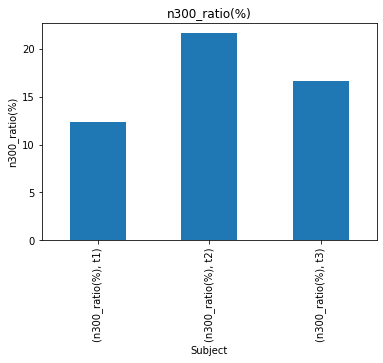

In [ ]:
parameters=[Param_n300_ratio]

#dfNew.groupby('subject_id').sum().plot(kind='bar')
for param in parameters:
  s=dfNew[['subject_id','modality',param]]
  #s.groupby(by=['subject_id']).sum().plot( kind='bar')
  s.groupby(by=['subject_id']).mean().unstack().plot.bar()
  plt.xlabel('Subject')
  plt.ylabel(param)
  plt.title(param)
  #plt.plot(data=s, kind='bar')
  #plt.show

What are the most frequent errors performed by the two MT systems that get corrected during post-editing? Annotate the data with POS/NER/Morphological information.

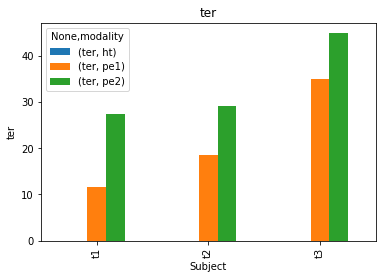

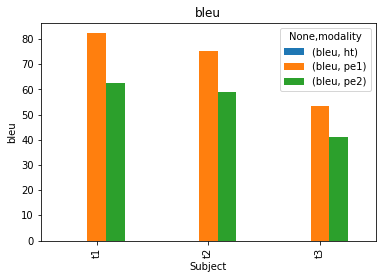

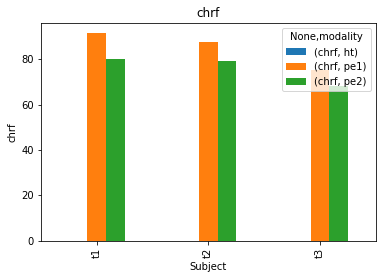

In [ ]:
  parameters_avg=[Param_TER,Param_BLEU,Param_CHRF]
  for param in parameters_avg:
    s=dfNew[['subject_id','modality',param]]
    #s.groupby(by=['subject_id']).mean().plot( kind='bar')
   # s.groupby(by=['subject_id','modality']).mean().unstack().plot( kind='bar')
    s.groupby(by=['subject_id','modality']).mean().unstack().plot.bar()
    plt.xlabel('Subject')
    plt.ylabel(param)
    plt.title(param)
    plt.show
    